#**Import required libriaries**

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier

In [34]:
loan_data = pd.read_csv("/content/sample_data/loan_grant.csv")

In [35]:
loan_data.head()

,Loan_ID,Gender,ApplicantIncome,LoanAmount,Loan_Status
0,LP001002,Male,5849,NaN,Y
1,LP001003,Male,4583,128.0,N
2,LP001005,Male,3000,66.0,Y
3,LP001006,Male,2583,120.0,Y
4,LP001008,Male,6000,141.0,Y


In [36]:
loan_data.shape

(614, 5)

In [37]:
loan_data.dtypes

,0
Loan_ID,object
Gender,object
ApplicantIncome,int64
LoanAmount,float64
Loan_Status,object


In [38]:
loan_data.isnull().sum()

,0
Loan_ID,0
Gender,13
ApplicantIncome,0
LoanAmount,22
Loan_Status,0


In [39]:
loan_data.isna().sum()

,0
Loan_ID,0
Gender,13
ApplicantIncome,0
LoanAmount,22
Loan_Status,0


In [40]:
gender = []
val = loan_data.Gender.mode()[0]
for i in loan_data.Gender:
  if type(i) == float:
    gender.append(val)
  else:
    gender.append(i)
loan_data.Gender = gender

In [41]:
loan_data.LoanAmount = loan_data.LoanAmount.fillna(loan_data.LoanAmount.mean())


In [42]:
loan_data.isnull().sum()

,0
Loan_ID,0
Gender,0
ApplicantIncome,0
LoanAmount,0
Loan_Status,0


In [43]:
loan_data.head()

,Loan_ID,Gender,ApplicantIncome,LoanAmount,Loan_Status
0,LP001002,Male,5849,146.412162,Y
1,LP001003,Male,4583,128.000000,N
2,LP001005,Male,3000,66.000000,Y
3,LP001006,Male,2583,120.000000,Y
4,LP001008,Male,6000,141.000000,Y


In [44]:
Target_ratio = loan_data.Loan_Status.value_counts()/len(loan_data)
Target_ratio


,count
Loan_Status,
Y,0.687296
N,0.312704


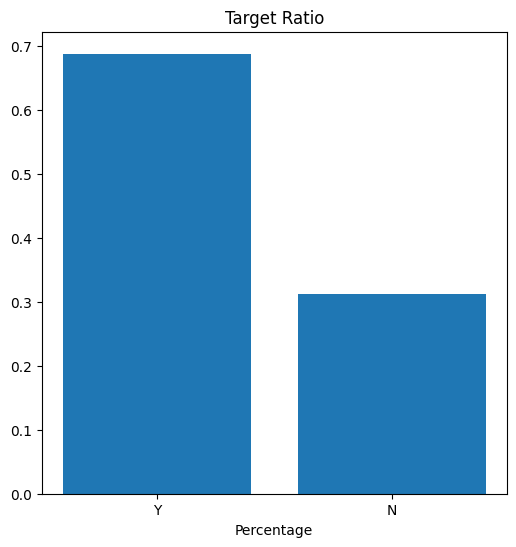

In [45]:
plt.figure(figsize = (6, 6))
plt.bar(Target_ratio.index, Target_ratio)
plt.title("Target Ratio")
plt.xlabel("Percentage")
plt.show()

#Encode target variable

In [47]:
lb = LabelEncoder()
lb.fit(loan_data.Loan_Status)
loan_data.Loan_Status = lb.transform(loan_data.Loan_Status)

LabelEncoder()

In [49]:
loan_data.head()

,Loan_ID,Gender,ApplicantIncome,LoanAmount,Loan_Status
0,LP001002,Male,5849,146.412162,Y
1,LP001003,Male,4583,128.000000,N
2,LP001005,Male,3000,66.000000,Y
3,LP001006,Male,2583,120.000000,Y
4,LP001008,Male,6000,141.000000,Y


In [50]:
x = loan_data[['ApplicantIncome','LoanAmount']]
y = loan_data.Loan_Status

In [51]:
scl = RobustScaler()
x = scl.fit_transform(x)

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2, random_state = 42)


Some important hyperparameters that should be considered before training the model:
- __C__: Regularization parameter which a float value and is __1.0__ by default. Must be strictly positive.
- __kernel__: Specifies the kernel type to be used in the algorithm. `‘linear’, ‘poly’, ‘rbf’`
- __degree__: An optional integer value to specify the degree of polynomial kernel fucntion which is ignored by all other kernels.
- __gamma__: Kernel coefficient for `'rbf','poly'`
- __coef0__: Independent term in kernel function which is significant in `'poly'`.

For further information about other parameter you can refer to: <a href='https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'>SVC scikit-learn</a>

In [56]:
svc_loan = SVC(C = 10, kernel = 'linear')
svc_loan.fit(x_train, y_train)

SVC(C=10, kernel='linear')

In [58]:
pred = svc_loan.predict(x_test)
acc_svc_loan = accuracy_score(y_test, pred)
acc_svc_loan


0.6504065040650406

In [59]:
svc_loan = SVC(C = 10, kernel = 'rbf', gamma = 2)
svc_loan.fit(x_train, y_train)

SVC(C=10, gamma=2)

In [61]:
pred_gayssian = svc_loan.predict(x_test)
acc_svc_loan_gayssian = accuracy_score(y_test, pred_gayssian)

In [62]:
print("Accuracy svc loan gaysian: ", acc_svc_loan_gayssian)

Accuracy svc loan gaysian:  0.6341463414634146
